In [1]:
import sys
import os

# Adiciona o caminho do diretório pai ao Python
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\papelao.csv'

df = pd.read_csv(DATA)

df.head()

,massa
0,102
1,107
2,100
3,101
4,106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   massa   40 non-null     int64
dtypes: int64(1)
memory usage: 452.0 bytes


In [4]:
df.describe()

,massa
count,40.000000
mean,104.075000
std,4.293033
min,97.000000
25%,100.000000
50%,103.500000
75%,107.000000
max,115.000000


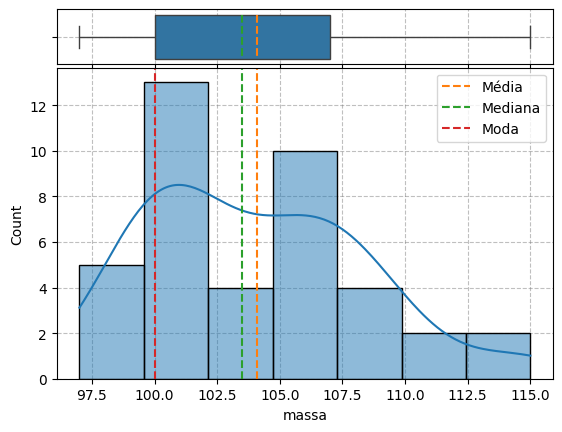

In [5]:
from meus_modulos.auxiliares import hist_box

hist_box(df, 'massa')

In [6]:
from meus_modulos.auxiliares import analise_shapiro

analise_shapiro(df)

Teste de Shapiro-Wilk
estatistica_sw=0.946
massa segue uma distribuição normal (valor p: valor_p_sw=0.057)


In [7]:
import numpy as np
from scipy.stats import norm
from collections import namedtuple

def teste_z(dados, media_pop, desvio_pop):

    n = len(dados)
    media_amostral = np.mean(dados)
    desvio_media_amostral = desvio_pop / np.sqrt(n)

    z = (media_amostral - media_pop) / desvio_media_amostral
    valor_p = 1 - norm.cdf(z)

    TesteZ  = namedtuple('TesteZ', ['estatística', 'valor_p'])
    return TesteZ(z, valor_p)

In [8]:
resultado = teste_z(df['massa'], 100, 12)

resultado

TesteZ(estatística=2.1477135775310257, valor_p=0.01586825804401104)

In [9]:
resultado.estatística

2.1477135775310257

In [10]:
resultado.valor_p

0.01586825804401104

In [11]:
norm.cdf(2.1477135775310257)

0.984131741955989

In [12]:
1 - norm.cdf(2.1477135775310257) #valor p menor que 0.05 -> hip. nula rejeitada

0.01586825804401104

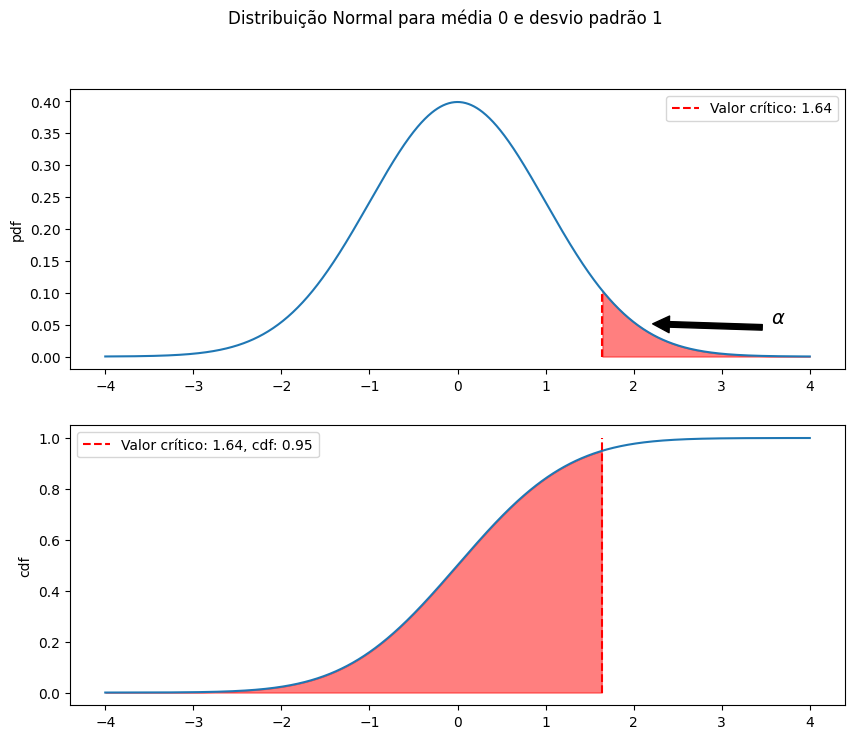

In [13]:
from meus_modulos.graficos import plot_normal

plot_normal(0, 1, 0.05, 'direita')

In [14]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\tempo_maquina.csv'

df = pd.read_csv(DATA)

df.head()

,tempo
0,21.5
1,16.0
2,15.4
3,9.5
4,16.7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tempo   25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes


In [16]:
df.describe()

,tempo
count,25.000000
mean,16.744000
std,2.797928
min,9.500000
25%,15.300000
50%,16.700000
75%,18.600000
max,21.500000


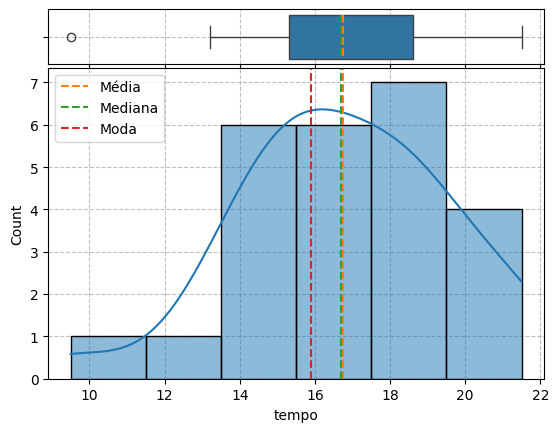

In [17]:
hist_box(df, 'tempo')

In [18]:
analise_shapiro(df, alfa=0.01)

Teste de Shapiro-Wilk
estatistica_sw=0.970
tempo segue uma distribuição normal (valor p: valor_p_sw=0.637)


In [19]:
from scipy.stats import ttest_1samp

ttest_1samp(df['tempo'], 18, alternative='less')

TtestResult(statistic=-2.244518242956968, pvalue=0.017143135109538014, df=24)

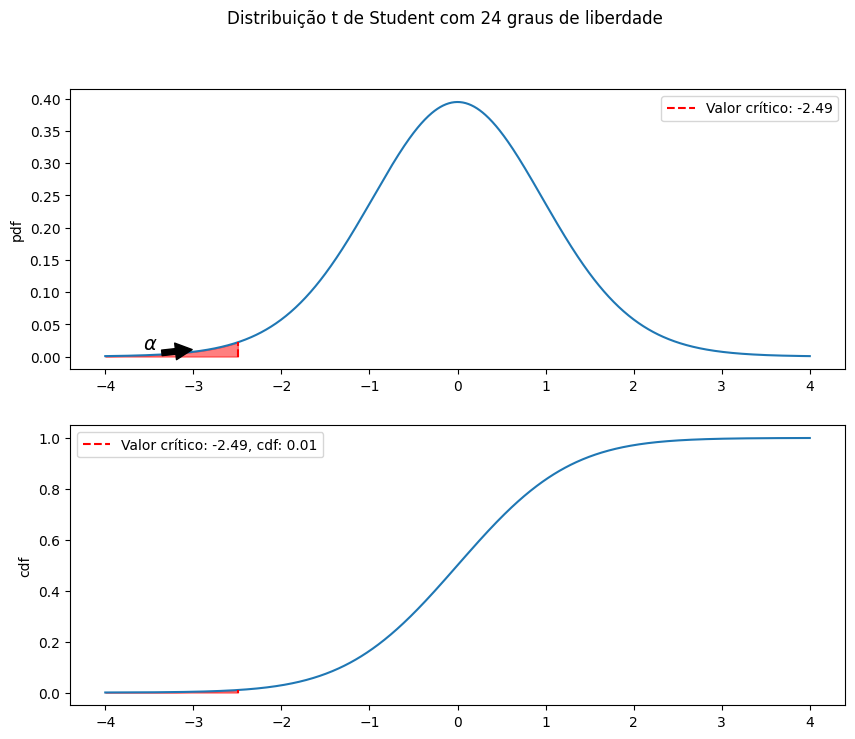

In [20]:
from meus_modulos.graficos import plot_t_student

plot_t_student(24, 0.01, lado = 'esquerda')

In [21]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\suppliers.csv'

df = pd.read_csv(DATA)

df.head()

,supplier_1,supplier_2
0,22.8,26.8
1,23.4,29.3
2,26.2,28.4
3,24.3,25.6
4,22.0,29.4


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   supplier_1  30 non-null     float64
 1   supplier_2  30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [23]:
df.describe()

,supplier_1,supplier_2
count,30.000000,30.000000
mean,24.276667,27.530000
std,1.345409,1.248489
min,22.000000,25.400000
25%,23.125000,26.800000
50%,24.250000,27.450000
75%,25.100000,28.475000
max,26.700000,29.700000


<Axes: ylabel='Count'>

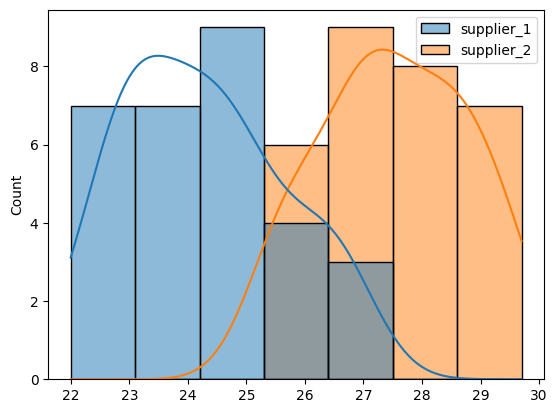

In [24]:
import seaborn as sns

sns.histplot(df, kde=True)

<Axes: >

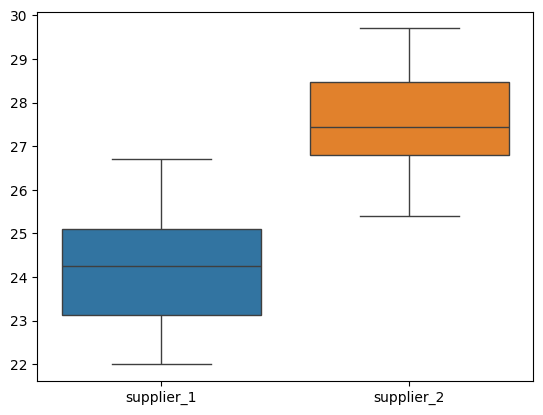

In [25]:
sns.boxplot(df)

In [26]:
from meus_modulos.auxiliares import analises_shapiro_levene

analises_shapiro_levene(df)

Teste de Shapiro-Wilk
estatistica_sw=0.945
supplier_1 segue uma distribuição normal (valor p: valor_p_sw=0.127)
estatistica_sw=0.959
supplier_2 segue uma distribuição normal (valor p: valor_p_sw=0.298)

Teste de Levene
estatistica_levene=0.156
Variâncias iguais (valor p: valor_p_lv=0.694)


In [27]:
from scipy.stats import ttest_ind

ttest_ind(df['supplier_1'], df['supplier_2'], equal_var=True)

TtestResult(statistic=-9.70841463275532, pvalue=9.185777525386829e-14, df=58.0)

In [28]:
from meus_modulos.auxiliares import analise_ttest_ind

analise_ttest_ind(df)

estatistica_ttest=-9.708
Rejeita a hipótese nula (valor p: valor_p_ttest=0.000)


In [ ]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\operators.csv'

df = pd.read_csv(DATA)

df.head()

,operator_1,operator_2
0,3.2,3.0
1,3.6,3.3
2,3.4,3.5
3,3.8,3.6
4,3.4,3.4


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   operator_1  10 non-null     float64
 1   operator_2  10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes


In [ ]:
df.describe()

,operator_1,operator_2
count,10.000000,10.000000
mean,3.520000,3.330000
std,0.234758,0.216282
min,3.200000,3.000000
25%,3.400000,3.225000
50%,3.500000,3.350000
75%,3.675000,3.475000
max,3.900000,3.600000


<Axes: ylabel='Count'>

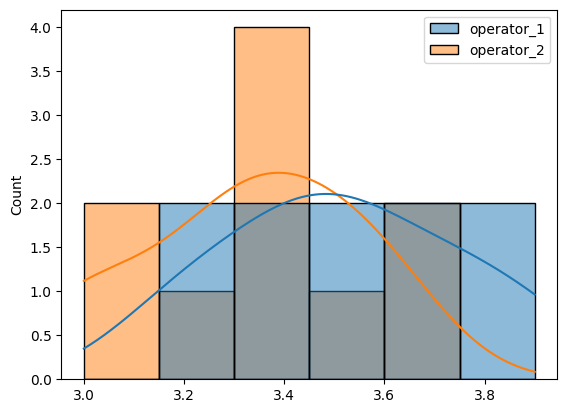

In [32]:
sns.histplot(df, kde=True)

<Axes: >

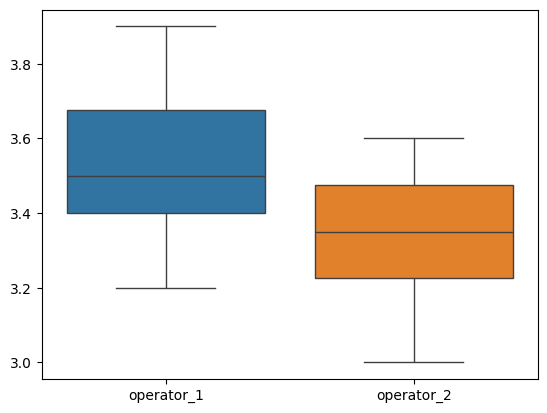

In [33]:
sns.boxplot(df)

In [34]:
analises_shapiro_levene(df)

Teste de Shapiro-Wilk
estatistica_sw=0.954
operator_1 segue uma distribuição normal (valor p: valor_p_sw=0.715)
estatistica_sw=0.920
operator_2 segue uma distribuição normal (valor p: valor_p_sw=0.353)

Teste de Levene
estatistica_levene=0.061
Variâncias iguais (valor p: valor_p_lv=0.808)


In [35]:
from scipy.stats import ttest_rel

ttest_rel(df['operator_1'], df['operator_2'])

TtestResult(statistic=4.384615384615384, pvalue=0.0017592708301478804, df=9)

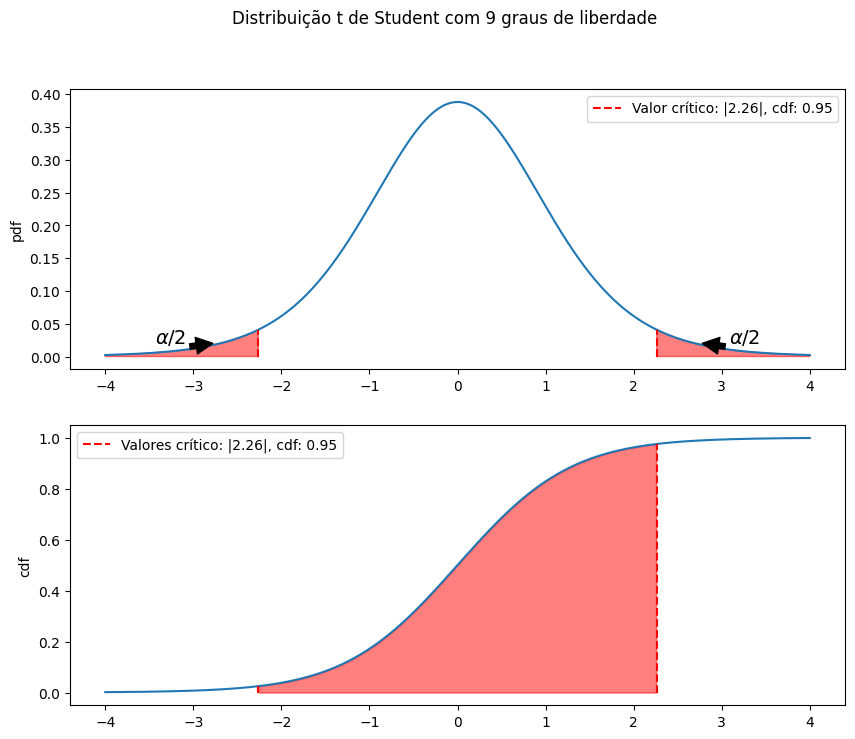

In [36]:
plot_t_student(9, 0.05)

In [37]:
from meus_modulos.auxiliares import analise_ttest_rel

analise_ttest_rel(df)

estatistica_ttest=4.385
Rejeita a hipótese nula (valor p: valor_p_ttest=0.002)


In [38]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\honey.csv'

df = pd.read_csv(DATA)

df.head()

,supplier_1,supplier_2,supplier_3
0,0.33,1.54,1.47
1,0.79,1.11,1.69
2,1.24,0.97,1.55
3,1.75,2.57,2.04
4,0.94,2.94,2.67


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   supplier_1  12 non-null     float64
 1   supplier_2  10 non-null     float64
 2   supplier_3  10 non-null     float64
dtypes: float64(3)
memory usage: 420.0 bytes


In [40]:
df.describe()

,supplier_1,supplier_2,supplier_3
count,12.000000,10.000000,10.000000
mean,1.315833,2.285000,2.338000
std,0.849540,0.947972,0.886489
min,0.330000,0.970000,1.470000
25%,0.790000,1.572500,1.585000
50%,1.090000,2.305000,2.035000
75%,1.805000,3.000000,2.970000
max,3.120000,3.550000,4.010000


<Axes: ylabel='Count'>

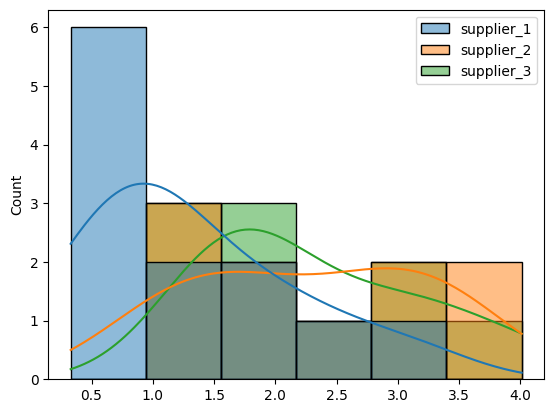

In [41]:
sns.histplot(df, kde=True)

<Axes: >

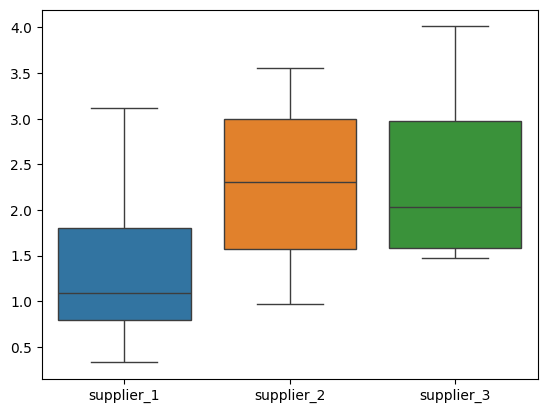

In [42]:
sns.boxplot(df)

In [43]:
analises_shapiro_levene(df)

Teste de Shapiro-Wilk
estatistica_sw=0.915
supplier_1 segue uma distribuição normal (valor p: valor_p_sw=0.246)
estatistica_sw=0.929
supplier_2 segue uma distribuição normal (valor p: valor_p_sw=0.438)
estatistica_sw=0.883
supplier_3 segue uma distribuição normal (valor p: valor_p_sw=0.142)

Teste de Levene
estatistica_levene=0.337
Variâncias iguais (valor p: valor_p_lv=0.716)


In [44]:
from scipy.stats import f_oneway

f_oneway(df['supplier_1'], df['supplier_2'], df['supplier_3'], nan_policy = 'omit')

F_onewayResult(statistic=4.675996744085605, pvalue=0.017371839041354836)

In [45]:
from meus_modulos.auxiliares import analise_f_oneway

analise_f_oneway(df)

Teste ANOVA one way
estatistica_anova=4.676
Rejeita a hipótese nula (valor p: valor_p_anova=0.017)


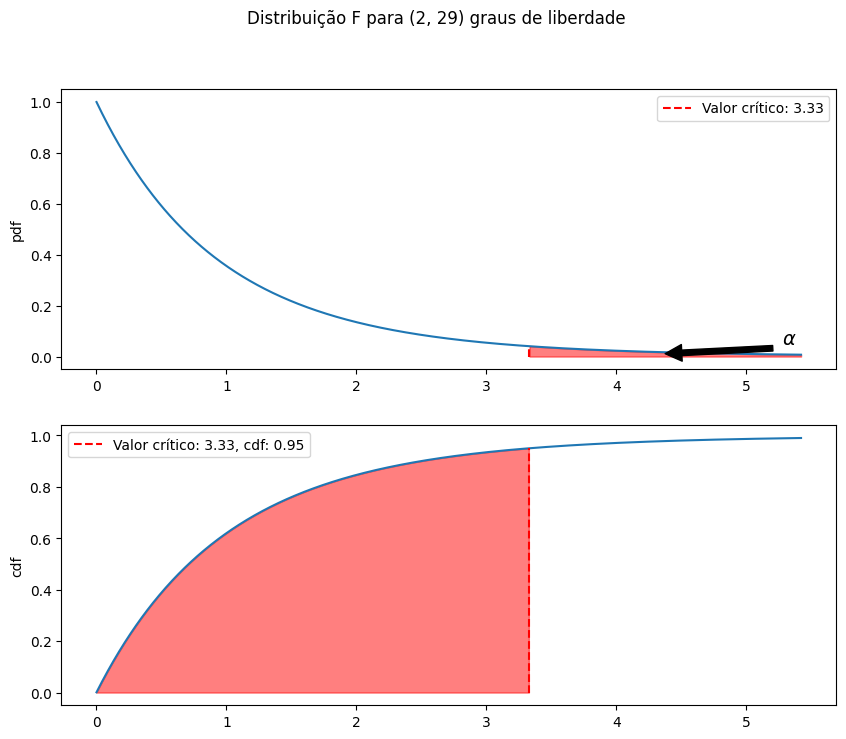

In [46]:
from meus_modulos.graficos import plot_f_snedecor

plot_f_snedecor((2,29), 0.05)

In [50]:
df.columns

Index(['supplier_1', 'supplier_2', 'supplier_3'], dtype='object')

In [49]:
from scipy.stats import tukey_hsd

print(tukey_hsd(*[df[coluna].dropna() for coluna in df.columns]))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.969     0.043    -1.913    -0.025
 (0 - 2)     -1.022     0.032    -1.966    -0.078
 (1 - 0)      0.969     0.043     0.025     1.913
 (1 - 2)     -0.053     0.990    -1.039     0.933
 (2 - 0)      1.022     0.032     0.078     1.966
 (2 - 1)      0.053     0.990    -0.933     1.039



In [51]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\sales_day.csv'

df = pd.read_csv(DATA)

df.head()

,Day,Sales
0,Sun,35
1,Mon,24
2,Tue,27
3,Wed,32
4,Thu,25


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     7 non-null      object
 1   Sales   7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


In [53]:
df.describe()

,Sales
count,7.000000
mean,30.000000
std,4.760952
min,24.000000
25%,26.000000
50%,31.000000
75%,33.500000
max,36.000000


In [54]:
from scipy.stats import chisquare

chisquare(df['Sales'])

Power_divergenceResult(statistic=4.533333333333333, pvalue=0.6048969327419378)

In [55]:
chisquare(df['Sales'], 30)

Power_divergenceResult(statistic=4.533333333333333, pvalue=0.6048969327419378)

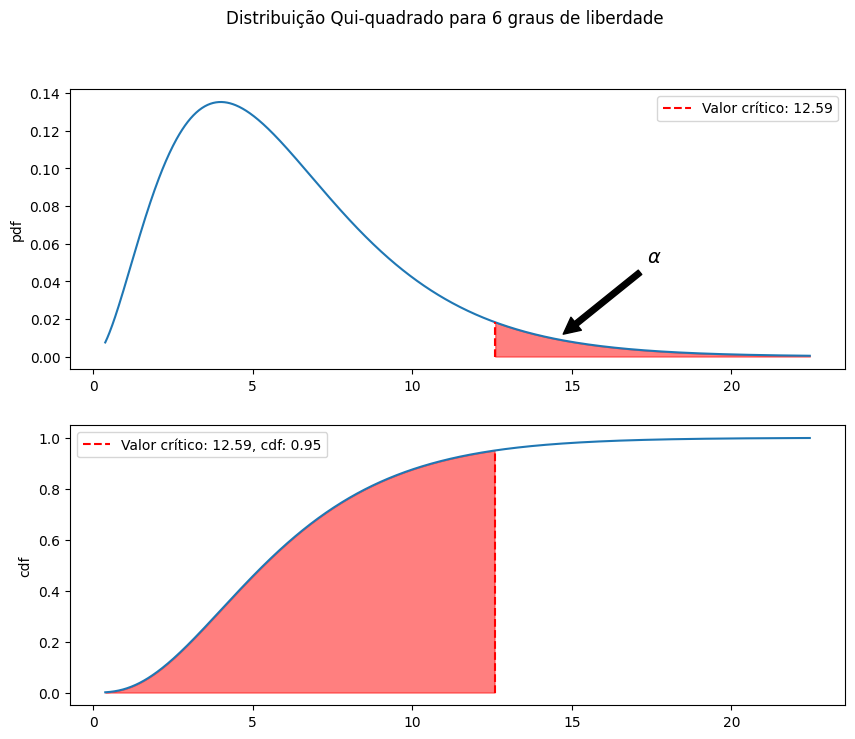

In [56]:
from meus_modulos.graficos import plot_chi2

plot_chi2(6, 0.05)